In [189]:
#importing libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

pd.pandas.set_option('display.max_columns',None)

In [190]:
df = pd.read_csv('spotify-2023.csv', encoding='latin-1')

In [191]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6


In [193]:
df.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

In [194]:
#Coverting streams into float
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

In [195]:
top_streams = df[['track_name', 'artist(s)_name', 'streams']].sort_values(by='streams', ascending=False).head(10)
top_streams

,track_name,artist(s)_name,streams
55,Blinding Lights,The Weeknd,3.703895e+09
179,Shape of You,Ed Sheeran,3.562544e+09
86,Someone You Loved,Lewis Capaldi,2.887242e+09
620,Dance Monkey,Tones and I,2.864792e+09
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2.808097e+09
162,One Dance,"Drake, WizKid, Kyla",2.713922e+09
84,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2.665344e+09
140,Believer,Imagine Dragons,2.594040e+09
725,Closer,"The Chainsmokers, Halsey",2.591224e+09
48,Starboy,"The Weeknd, Daft Punk",2.565530e+09


Text(0.5, 1.0, 'Top 10 Songs with Most Streams on Spotify')

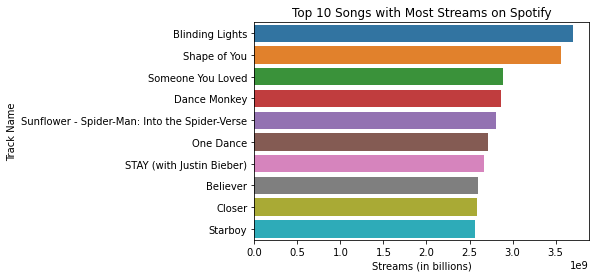

In [132]:
sns.barplot(x=top_streams['streams'], y=top_streams['track_name'])
plt.xlabel('Streams (in billions)')
plt.ylabel('Track Name')
plt.title('Top 10 Songs with Most Streams on Spotify')

In [196]:
top_artists = df['artist(s)_name'].value_counts().head(5)

Text(0.5, 1.0, 'Top 5 Artists with Most Songs')

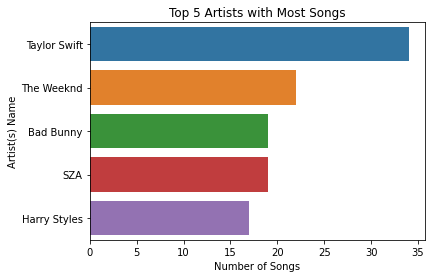

In [197]:
sns.barplot(x=top_artists.values, y=top_artists.index, data=df)
plt.xlabel('Number of Songs')
plt.ylabel('Artist(s) Name')
plt.title('Top 5 Artists with Most Songs')

In [199]:
#Filtering out data of between 2020 and 2023
filtered_data = df[(df['released_year'] >= 2020) & (df['released_year'] <= 2023)]

In [200]:
song_counts_by_year = filtered_data['released_year'].value_counts().sort_index()

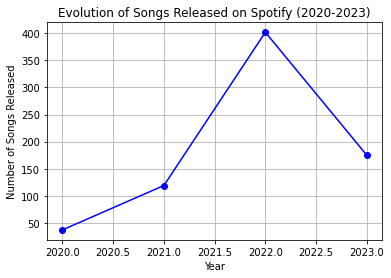

In [201]:
plt.plot(song_counts_by_year.index, song_counts_by_year.values, marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Number of Songs Released')
plt.title('Evolution of Songs Released on Spotify (2020-2023)')
plt.grid(True)

In [204]:
songs_by_month = df.groupby('released_month')['track_name'].count()

Text(0.5, 1.0, 'Distribution of Songs by Month')

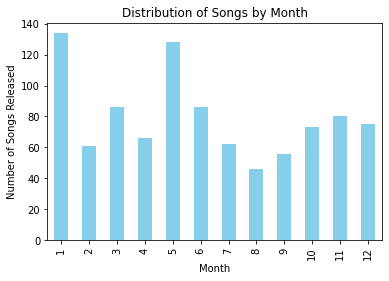

In [205]:
songs_by_month.plot(kind='bar', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Number of Songs Released')
plt.title('Distribution of Songs by Month')

In [206]:
songs_by_day = df.groupby('released_day')['track_name'].count()

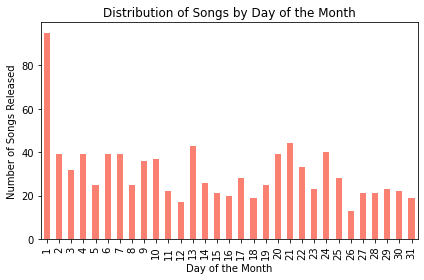

In [207]:
songs_by_day.plot(kind='bar', color='salmon')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Songs Released')
plt.title('Distribution of Songs by Day of the Month')

plt.tight_layout()

In [213]:
correlation = df['in_spotify_playlists'].corr(df['streams'])

In [211]:
correlation

0.7898221599550629

Text(0.5, 1.0, 'Correlation between Spotify Playlists and Streams (Correlation Coefficient: 0.79)')

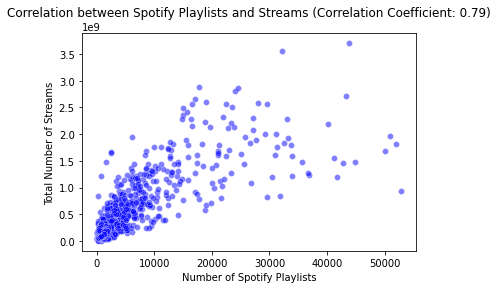

In [210]:
sns.scatterplot(data=data, x='in_spotify_playlists', y='streams', color='blue', alpha=0.5)
plt.xlabel('Number of Spotify Playlists')
plt.ylabel('Total Number of Streams')
plt.title(f'Correlation between Spotify Playlists and Streams (Correlation Coefficient: {correlation:.2f})')

In [212]:
if correlation > 0:
    print("There is a positive correlation between the number of Spotify playlists and total streams.")
elif correlation < 0:
    print("There is a negative correlation between the number of Spotify playlists and total streams.")
else:
    print("There is no linear correlation between the number of Spotify playlists and total streams.")

There is a positive correlation between the number of Spotify playlists and total streams.


In [172]:
spotify_chart_trends = data.groupby(['released_year', 'released_month'])['in_spotify_charts'].sum().reset_index()

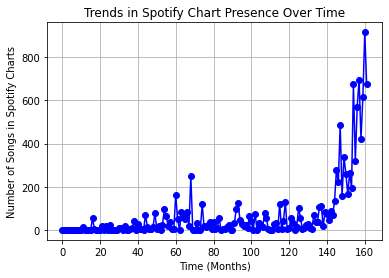

In [174]:
plt.plot(spotify_chart_trends.index, spotify_chart_trends['in_spotify_charts'], marker='o', linestyle='-', color='b')
plt.xlabel('Time (Months)')
plt.ylabel('Number of Songs in Spotify Charts')
plt.title('Trends in Spotify Chart Presence Over Time')
plt.grid(True)

Text(0.5, 1.0, 'Distribution of Song Tempos (BPM)')

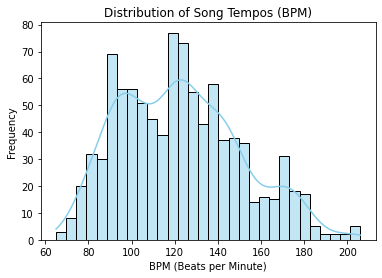

In [214]:
sns.histplot(data=df, x='bpm', bins=30, kde=True, color='skyblue')
plt.xlabel('BPM (Beats per Minute)')
plt.ylabel('Frequency')
plt.title('Distribution of Song Tempos (BPM)')

In [217]:
correlation_matrix = df[['danceability_%', 'valence_%', 'energy_%']].corr()

Text(0.5, 1.0, 'Correlation Between Danceability, Valence, and Energy')

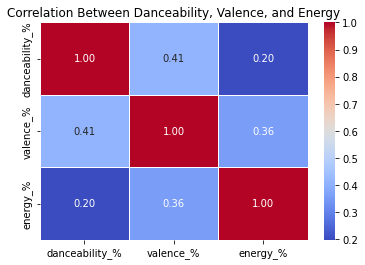

In [218]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Between Danceability, Valence, and Energy')

In [219]:
dance_valence_corr = correlation_matrix.loc['danceability_%', 'valence_%']
dance_energy_corr = correlation_matrix.loc['danceability_%', 'energy_%']
valence_energy_corr = correlation_matrix.loc['valence_%', 'energy_%']

In [220]:
print(f'Correlation between Danceability and Valence: {dance_valence_corr:.2f}')
print(f'Correlation between Danceability and Energy: {dance_energy_corr:.2f}')
print(f'Correlation between Valence and Energy: {valence_energy_corr:.2f}')

Correlation between Danceability and Valence: 0.41
Correlation between Danceability and Energy: 0.20
Correlation between Valence and Energy: 0.36


In [182]:
columns_to_analyze = ['acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

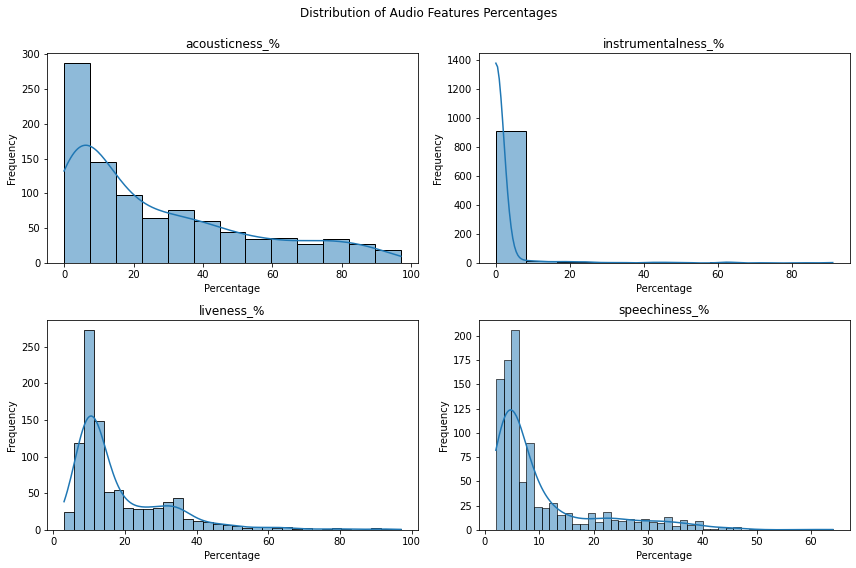

In [221]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.suptitle('Distribution of Audio Features Percentages')

for i, column in enumerate(columns_to_analyze):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    sns.histplot(data=data, x=column, kde=True, ax=ax)
    ax.set_title(column)
    ax.set_xlabel('Percentage')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.subplots_adjust(top=0.9)

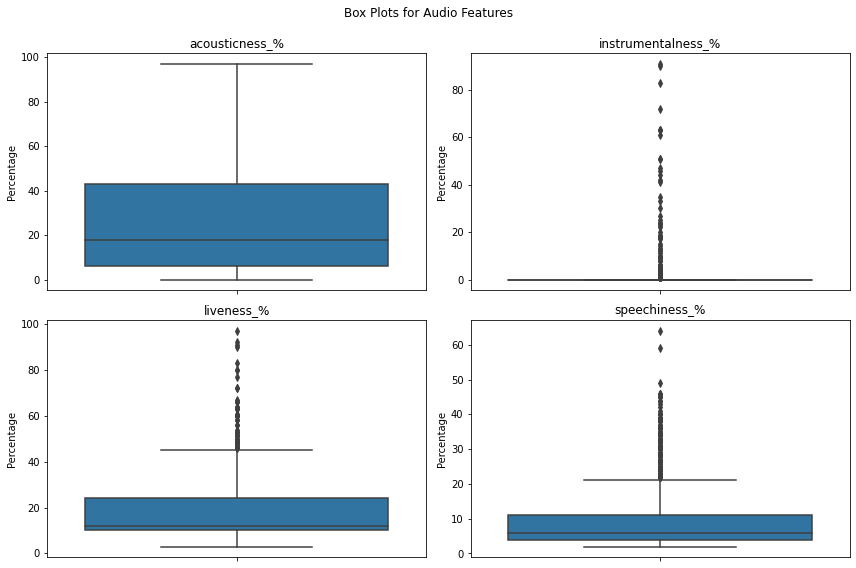

In [222]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.suptitle('Box Plots for Audio Features')

for i, column in enumerate(columns_to_analyze):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    sns.boxplot(data=df, y=column, ax=ax)
    ax.set_title(column)
    ax.set_ylabel('Percentage')

plt.tight_layout()
plt.subplots_adjust(top=0.9)

Text(0.5, 1.0, 'Relationship Between Valence and Speechiness in Songs')

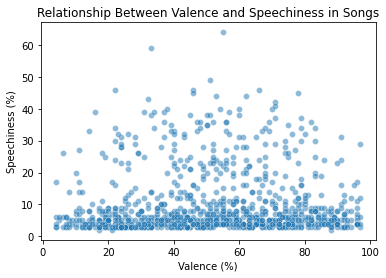

In [223]:
sns.scatterplot(data=df, x='valence_%', y='speechiness_%', alpha=0.5)
plt.xlabel('Valence (%)')
plt.ylabel('Speechiness (%)')
plt.title('Relationship Between Valence and Speechiness in Songs')

In [224]:
correlation_coefficient, p_value = stats.pearsonr(df['valence_%'], df['speechiness_%'])
print(f"Correlation Coefficient: {correlation_coefficient:.2f}")

<IPython.core.display.Javascript object>

Correlation Coefficient: 0.04
